In [1]:
from indennt.models import UNet, torch
from indennt.core import correct_single_igram, correct_igram_dir
import matplotlib.pyplot as plt

In [2]:
#load model
model = UNet()
model.load_state_dict(torch.load('weights/noisemodel1.6_62epochs', map_location=torch.device('cpu')))
model.eval();

In [3]:
# correct a single hyp3 interferogram, return xarray ds
igram_path = '/mnt/d/indennt/hyp3_app/AT137/2020/S1BB_20200808T011058_20201007T011100_VVP060_INT40_G_ueF_70CB'
ds = correct_single_igram(igram_path,
                          model,
                          processor='hyp3',
                          igram_suffix='unw_phase.tif',
                          dem_suffix='dem.tif',
                          igram_norm=[-50, 50],
                          dem_norm=[1200, 4060],
                          use_igram_range = False,
                          use_dem_range=False
                         )

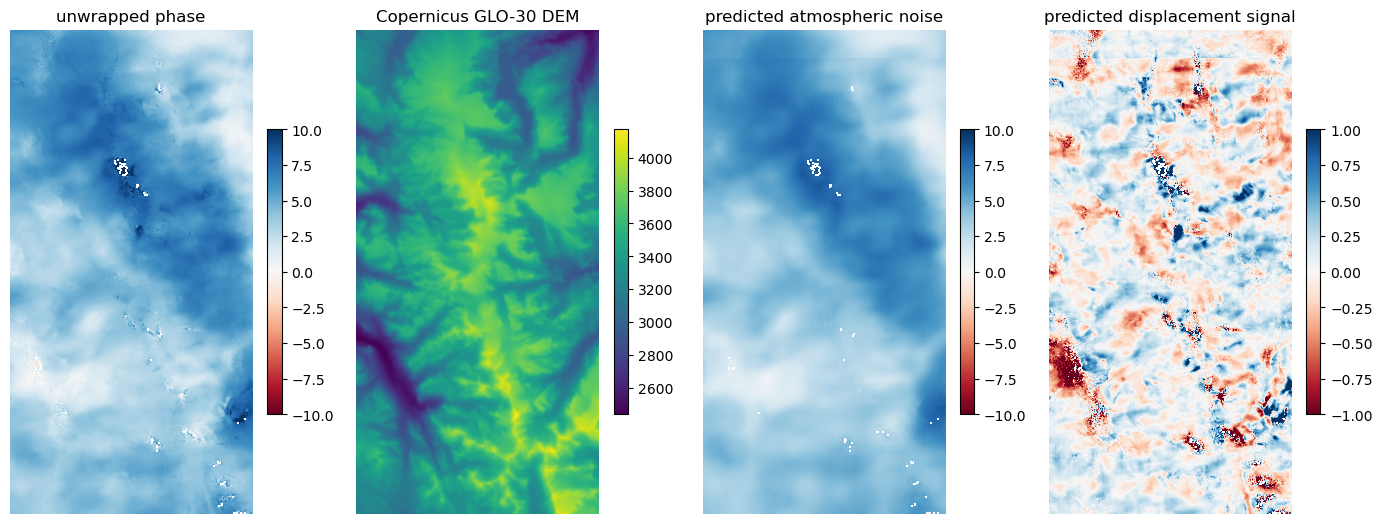

In [4]:
subset = {'y':slice(2000, 2800), 'x':slice(2500, 2900)}

f, ax = plt.subplots(1, 4, figsize=(14, 6))
im0 = ax[0].imshow(ds.unw_phase.isel(subset), vmin=-10, vmax=10, cmap='RdBu')
ax[0].set_title('unwrapped phase')
ax[0].set_aspect('equal')
ax[0].axis('off')
f.colorbar(im0, ax=ax[0], location='right', shrink=0.5)

im1 = ax[1].imshow(ds.elevation.isel(subset), cmap='viridis')
ax[1].set_title('Copernicus GLO-30 DEM')
ax[1].set_aspect('equal')
ax[1].axis('off')
f.colorbar(im1, ax=ax[1], location='right', shrink=0.5)

im2 = ax[2].imshow(ds.pred_noise.isel(subset), vmin=-10, vmax=10, cmap='RdBu')
ax[2].set_title('predicted atmospheric noise')
ax[2].set_aspect('equal')
ax[2].axis('off')
f.colorbar(im2, ax=ax[2], location='right', shrink=0.5)

im3 = ax[3].imshow(ds.pred_signal.isel(subset), vmin=-1, vmax=1, cmap='RdBu')
ax[3].set_title('predicted displacement signal')
ax[3].set_aspect('equal')
ax[3].axis('off')
f.colorbar(im3, ax=ax[3], location='right', shrink=0.5)
f.tight_layout()

#plt.savefig('./images/example_correction.png', dpi=300)

In [ ]:
# correct a single isce interferogram, return xarray ds
igram_path = '/mnt/d/indennt/isce_app/AT137/2020/20200808-20201007'
ds = correct_single_igram(igram_path,
                          model,
                          processor='isce',
                          igram_norm=[-50, 50],
                          dem_norm=[1200, 4060],
                          use_igram_range = False,
                          use_dem_range=False
                         )

/home/gbrench/sw/miniconda3/envs/indennt/lib/python3.11/site-packages/rioxarray/_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


In [ ]:
subset = {'y':slice(4800, 5500), 'x':slice(5400, 5800)}

f, ax = plt.subplots(1, 4, figsize=(14, 6))
im0 = ax[0].imshow(ds.unw_phase.isel(subset), vmin=-10, vmax=10, cmap='RdBu')
ax[0].set_title('unwrapped phase')
ax[0].set_aspect('equal')
ax[0].axis('off')
f.colorbar(im0, ax=ax[0], location='right', shrink=0.5)

im1 = ax[1].imshow(ds.elevation.isel(subset), cmap='viridis')
ax[1].set_title('SRTM DEM')
ax[1].set_aspect('equal')
ax[1].axis('off')
f.colorbar(im1, ax=ax[1], location='right', shrink=0.5)

im2 = ax[2].imshow(ds.pred_noise.isel(subset), vmin=-10, vmax=10, cmap='RdBu')
ax[2].set_title('predicted atmospheric noise')
ax[2].set_aspect('equal')
ax[2].axis('off')
f.colorbar(im2, ax=ax[2], location='right', shrink=0.5)

im3 = ax[3].imshow(ds.pred_signal.isel(subset), vmin=-1, vmax=1, cmap='RdBu')
ax[3].set_title('predicted displacement signal')
ax[3].set_aspect('equal')
ax[3].axis('off')
f.colorbar(im3, ax=ax[3], location='right', shrink=0.5)
f.tight_layout()

In [ ]:
# # correct multiple hyp3 interferograms
# hyp3_path = '/mnt/d/indennt/hyp3_app/AT137/2017' # dir containing hyp3 outputs
# correct_igram_dir(hyp3_path,
#                   model,
#                   processor='hyp3',
#                   igram_suffix='unw_phase.tif',
#                   dem_suffix='dem.tif',
#                   igram_norm=[-50, 50],
#                   dem_norm=[1200, 4060],
#                   use_igram_range = False,
#                   use_dem_range=False,
#                   skip_exist=True
#                  )

In [ ]:
# # correct multiple isce interferograms
# isce_path = '/mnt/d/indennt/isce_app/AT137/2020' # dir containing isce outputs
# correct_igram_dir(isce_path,
#                   model,
#                   processor='isce',
#                   igram_norm=[-50, 50],
#                   dem_norm=[1200, 4060],
#                   use_igram_range = False,
#                   use_dem_range=False,
#                   skip_exist=True
#                  )